In [73]:
import sqlalchemy 
from sqlalchemy import func
import pandas as pd
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine 
import matplotlib 
import matplotlib.pyplot as plt
import datetime

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [3]:
engine

Engine(sqlite:///hawaii.sqlite)

In [4]:
Base = automap_base() 

In [5]:
Base.prepare(engine, reflect=True) 

In [6]:
Base.classes.keys()

['measurements', 'station']

In [32]:
Measurements=Base.classes.measurements
Station=Base.classes.station
session= Session(engine)

In [36]:
measurement=session.query(Measurements.date, Measurements.prcp).group_by(Measurement.date).order_by(Measurement.date.desc()).filter(Measurement.date<='2017-05-05').filter(Measurement.date>='2016-05-05').all()

In [37]:
measurement

[('2017-05-05', 0.1),
 ('2017-05-04', 0.16064353974479206),
 ('2017-05-03', 0.01),
 ('2017-05-02', 0),
 ('2017-05-01', 0.25),
 ('2017-04-30', 0.8),
 ('2017-04-29', 0),
 ('2017-04-28', 0.79),
 ('2017-04-27', 0.11),
 ('2017-04-26', 0.22),
 ('2017-04-25', 0),
 ('2017-04-24', 0.05),
 ('2017-04-23', 0.35),
 ('2017-04-22', 1.35),
 ('2017-04-21', 1.84),
 ('2017-04-20', 0),
 ('2017-04-19', 0.14),
 ('2017-04-18', 0.98),
 ('2017-04-17', 1.3),
 ('2017-04-16', 0.11),
 ('2017-04-15', 0.9),
 ('2017-04-14', 2.82),
 ('2017-04-13', 0.23),
 ('2017-04-12', 0.65),
 ('2017-04-11', 0.25),
 ('2017-04-10', 0),
 ('2017-04-09', 0),
 ('2017-04-08', 0.16064353974479206),
 ('2017-04-07', 0),
 ('2017-04-06', 0),
 ('2017-04-05', 0.45),
 ('2017-04-04', 0.02),
 ('2017-04-03', 0.23),
 ('2017-04-02', 0),
 ('2017-04-01', 0.2),
 ('2017-03-31', 0.16064353974479206),
 ('2017-03-30', 0.04),
 ('2017-03-29', 0.07),
 ('2017-03-28', 0.68),
 ('2017-03-27', 0),
 ('2017-03-26', 0),
 ('2017-03-25', 0.48),
 ('2017-03-24', 0.17),
 ('2

In [40]:
data =pd.DataFrame(measurement, columns=['Date', 'Prcp'])
data["Date"]=pd.to_datetime(data["Date"])
data.count()


Date    366
Prcp    366
dtype: int64

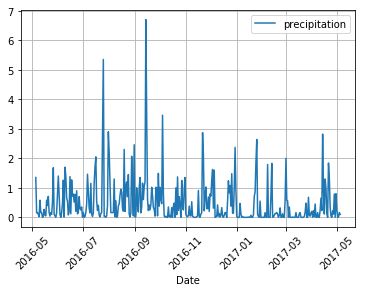

In [62]:
plt.plot(data['Date'],data['Prcp'], label = "precipitation")
plt.legend(loc='upper right')
plt.xticks(rotation='45')
plt.xlabel('Date')
plt.grid(True)
plt.figure(figsize=(30,20))
plt.show()


In [63]:
data.describe()

,Prcp
count,366.000000
mean,0.483483
std,0.753476
min,0.000000
25%,0.020000
50%,0.160644
75%,0.700000
max,6.700000


In [65]:
locations = session.query(Measurements).group_by(Measurements.station).count()
print(f"There are {locations} stations")

There are 9 stations


In [76]:
popularity = session.query(Measurements.station,func.count(Measurements.tobs)).group_by(Measurements.station).\
               order_by(func.count(Measurements.tobs).desc()).all()

popularity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [83]:
temperature = session.query(Measurements.station, Measurements.date, Measurements.tobs).\
    filter(Measurements.station =='USC00519281').\
    filter(Measurements.date >='2017-05-05').\
    order_by(Measurements.date).all()
temperature

[('USC00519281', '2017-05-05', 70),
 ('USC00519281', '2017-05-06', 79),
 ('USC00519281', '2017-05-07', 75),
 ('USC00519281', '2017-05-08', 70),
 ('USC00519281', '2017-05-09', 67),
 ('USC00519281', '2017-05-10', 74),
 ('USC00519281', '2017-05-11', 70),
 ('USC00519281', '2017-05-12', 75),
 ('USC00519281', '2017-05-13', 76),
 ('USC00519281', '2017-05-14', 77),
 ('USC00519281', '2017-05-15', 74),
 ('USC00519281', '2017-05-16', 74),
 ('USC00519281', '2017-05-17', 74),
 ('USC00519281', '2017-05-18', 69),
 ('USC00519281', '2017-05-19', 68),
 ('USC00519281', '2017-05-20', 76),
 ('USC00519281', '2017-05-21', 74),
 ('USC00519281', '2017-05-22', 71),
 ('USC00519281', '2017-05-23', 71),
 ('USC00519281', '2017-05-24', 74),
 ('USC00519281', '2017-05-25', 74),
 ('USC00519281', '2017-05-26', 74),
 ('USC00519281', '2017-05-27', 74),
 ('USC00519281', '2017-05-28', 80),
 ('USC00519281', '2017-05-29', 74),
 ('USC00519281', '2017-05-30', 72),
 ('USC00519281', '2017-05-31', 75),
 ('USC00519281', '2017-06-01

In [84]:
temp_df=pd.DataFrame(temperature)

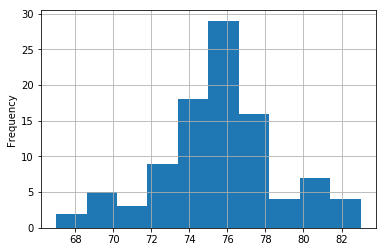

In [87]:
plt.hist(temp_df['tobs'])
plt.ylabel("Frequency")
plt.grid(True)
plt.show()
